# module04_vector_databases


## vector_databases.py
vector_databases.py
Explanation of Vector Databases
Vector databases are specialized databases designed to store and query high-dimensional vectors efficiently.
They enable fast similarity search, which is crucial for RAG applications.
Unlike traditional databases that store text/numbers, vector DBs store embeddings and find similar vectors.
Import required libraries for vector operations and similarity calculations
numpy for numerical array operations and vector handling


In [41]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class SimpleVectorDB:
    """
    Simple in-memory vector database implementation.
    Stores vectors and metadata, supports similarity search using cosine similarity.
    """

    def __init__(self):
        """Initialize the vector database."""
        self.vectors = []   # List to store vector embeddings
        self.metadata = []  # List to store associated metadata

    # Method to add a vector and its metadata to the database
    def add_vector(self, vector, metadata=None):
        """
        Add a vector to the database.
        Vectors are stored as numpy arrays for efficient computation.
        Metadata can include text content, IDs, timestamps, etc.
        """
        # Convert input vector to numpy array for consistent handling
        # This ensures all vectors are numpy arrays regardless of input type
        self.vectors.append(np.array(vector))
        # Store metadata, defaulting to empty dict if none provided
        self.metadata.append(metadata or {})

    # Method to search for most similar vectors to a query vector
    def search(self, query_vector, top_k=5):
        """
        Search for most similar vectors using cosine similarity.
        Cosine similarity measures angle between vectors, ranging from -1 to 1.
        Higher values indicate greater similarity.
        """
        # Return empty list if no vectors have been added yet
        if not self.vectors:
            return []

        # Convert query vector to numpy array and reshape to 2D (required by cosine_similarity)
        # reshape(1, -1) makes it a row vector: [vector] -> [[vector]]
        query = np.array(query_vector).reshape(1, -1)

        # Convert stored vectors list to numpy matrix for batch similarity calculation
        # This creates a matrix where each row is one stored vector
        vectors_matrix = np.array(self.vectors)

        # Calculate cosine similarity between query and all stored vectors
        # Result is a matrix; [0] takes the first (and only) row for our single query
        similarities = cosine_similarity(query, vectors_matrix)[0]

        # Get indices of top-k most similar vectors (highest similarity first)
        # np.argsort sorts in ascending order, [::-1] reverses to descending
        top_indices = np.argsort(similarities)[::-1][:top_k]

        # Build results list with vector data, similarity scores, and metadata
        results = []
        for idx in top_indices:
            # Create result dictionary for each top match
            results.append({
                'vector': self.vectors[idx],        # The actual vector embedding
                'similarity': similarities[idx],    # Cosine similarity score
                'metadata': self.metadata[idx]      # Associated metadata (e.g., text)
            })

        # Return the top-k most similar vectors with their metadata
        return results

In [42]:
# Example usage demonstrating the vector database functionality
# Create a new vector database instance
db = SimpleVectorDB()


In [43]:
# Add sample vectors representing different documents
# These are 3D vectors for simplicity; real embeddings are typically 384-768 dimensions
db.add_vector([1, 0, 0], {'text': 'Document about cats'})      # Vector points strongly in x-direction
db.add_vector([0, 1, 0], {'text': 'Document about dogs'})      # Vector points strongly in y-direction
db.add_vector([0.5, 0.5, 0], {'text': 'Document about pets'})  # Vector points diagonally (both cats and dogs)
db.add_vector([0, 0, 1], {'text': 'Document about weather'})   # Vector points in z-direction (unrelated)


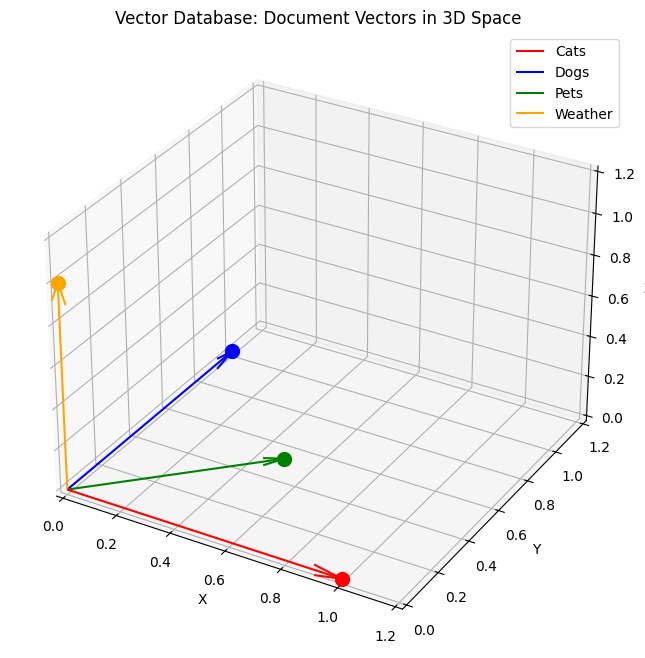

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the vectors in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

vectors = [[1, 0, 0], [0, 1, 0], [0.5, 0.5, 0], [0, 0, 1]]
labels = ['Cats', 'Dogs', 'Pets', 'Weather']
colors = ['red', 'blue', 'green', 'orange']

for i, (vec, label, color) in enumerate(zip(vectors, labels, colors)):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=color, label=label, arrow_length_ratio=0.1)
    ax.scatter(vec[0], vec[1], vec[2], color=color, s=100)

ax.set_xlim([0, 1.2])
ax.set_ylim([0, 1.2])
ax.set_zlim([0, 1.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Vector Database: Document Vectors in 3D Space')
plt.show()

In [45]:
# Query vector representing a search for cat-related content
# This vector is similar to the cat document vector [1,0,0]
query = [0.8, 0.2, 0]  # Mostly x-direction with small y-component


In [46]:
# Search for top 3 most similar vectors to the query
results = db.search(query, top_k=3)


In [47]:
# Display the search results
print("Search results:")
for i, result in enumerate(results):
    # Print ranking number (1-based)
    print(f"{i+1}. Similarity: {result['similarity']:.3f}")
    # Print the associated text from metadata
    print(f"   Text: {result['metadata']['text']}")
    # Print the actual vector values
    print(f"   Vector: {result['vector']}")


Search results:
1. Similarity: 0.970
   Text: Document about cats
   Vector: [1 0 0]
2. Similarity: 0.857
   Text: Document about pets
   Vector: [0.5 0.5 0. ]
3. Similarity: 0.243
   Text: Document about dogs
   Vector: [0 1 0]


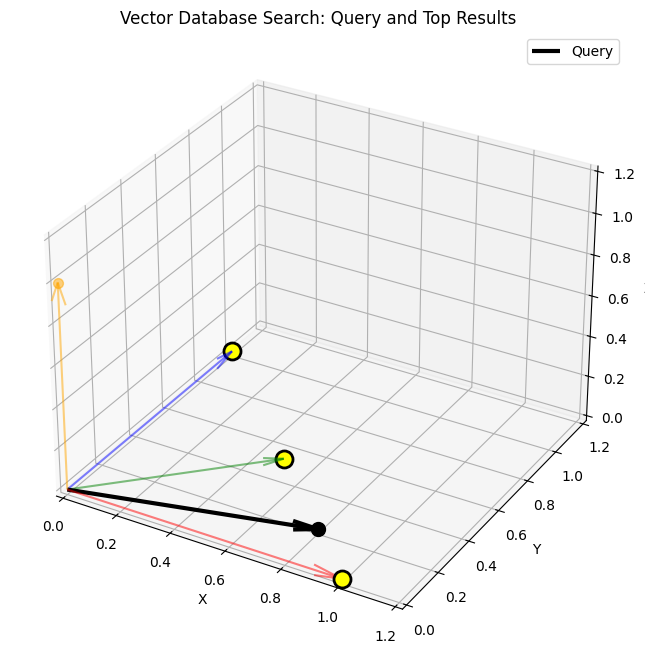

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the search: query vector and top results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all document vectors
vectors = [[1, 0, 0], [0, 1, 0], [0.5, 0.5, 0], [0, 0, 1]]
labels = ['Cats', 'Dogs', 'Pets', 'Weather']
colors = ['red', 'blue', 'green', 'orange']

for i, (vec, label, color) in enumerate(zip(vectors, labels, colors)):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=color, alpha=0.5, arrow_length_ratio=0.1)
    ax.scatter(vec[0], vec[1], vec[2], color=color, s=50, alpha=0.5)

# Plot query vector
ax.quiver(0, 0, 0, query[0], query[1], query[2], color='black', label='Query', linewidth=3, arrow_length_ratio=0.1)
ax.scatter(query[0], query[1], query[2], color='black', s=100)

# Highlight top results
top_vectors = [result['vector'] for result in results]
for vec in top_vectors:
    ax.scatter(vec[0], vec[1], vec[2], color='yellow', s=150, edgecolor='black', linewidth=2)

ax.set_xlim([0, 1.2])
ax.set_ylim([0, 1.2])
ax.set_zlim([0, 1.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Vector Database Search: Query and Top Results')
plt.show()

Additional explanation of real vector database features
Real vector databases go beyond this simple implementation:
- Support indexing for fast search (HNSW, IVF, LSH) - algorithms that speed up similarity search
- Handle millions/billions of vectors - scale to large datasets
- Provide filtering, metadata storage - search with additional constraints
- Offer APIs for CRUD operations - create, read, update, delete vectors
- Support real-time updates and batch operations - handle streaming data


## vector_db_implementations.py
vector_db_implementations.py
Explanation of Vector Database Implementations
Popular vector databases that provide efficient storage and retrieval of embeddings.
These are production-ready systems that handle millions of vectors with advanced indexing.
Note: This file demonstrates concepts; actual usage requires installing specific libraries
All examples are commented out to avoid dependency issues in the learning environment
Chroma - Open-source embedding database
Lightweight vector database that runs locally or in containers


In [49]:
def chroma_example():
    """
    Example of using Chroma vector database.
    Chroma is designed for AI applications and provides simple APIs for embedding storage.
    """
    try:
        import chromadb

        # Create a Chroma client (can be persistent or in-memory)
        # Client handles connection to Chroma server or local instance
        client = chromadb.Client()

        # Get or create a named collection to store vectors and metadata
        # Collections are like tables in traditional databases
        collection = client.get_or_create_collection("my_collection")

        # Prepare sample documents and their embeddings
        # In real usage, embeddings would come from models like sentence-transformers
        documents = ["This is a document about cats", "This is about dogs"]
        # Dummy 3D embeddings for demonstration (real embeddings are 384+ dimensions)
        embeddings = [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]
        # Unique IDs for each document/vector pair
        ids = ["doc1", "doc2"]

        # Add documents, embeddings, and IDs to the collection
        # Chroma automatically handles indexing for efficient similarity search
        collection.add(
            embeddings=embeddings,    # The vector representations
            documents=documents,      # Original text content
            ids=ids                   # Unique identifiers
        )

        # Create a query embedding (would normally be generated from user query)
        query_embedding = [0.15, 0.25, 0.35]

        # Perform similarity search using the query embedding
        # n_results specifies how many similar documents to return
        results = collection.query(
            query_embeddings=[query_embedding],  # Query vector(s)
            n_results=2                          # Number of results to return
        )

        # Display search results
        print("Chroma Results:")
        # Results contain documents and distances (lower distance = more similar)
        for doc, score in zip(results['documents'][0], results['distances'][0]):
            print(f"Document: {doc}, Distance: {score}")

    except ImportError:
        print("Chroma not installed. Install with: pip install chromadb")

In [50]:
def pinecone_example():
    """
    Example of using Pinecone (requires API key).
    Pinecone is a fully managed service that handles infrastructure and scaling.
    """
    try:
        from pinecone import Pinecone

        # Print information about Pinecone's features
        print("Pinecone: Managed cloud vector database")
        print("- Serverless architecture - no infrastructure management needed")
        print("- Automatic scaling - handles traffic spikes automatically")
        print("- RESTful API - simple HTTP interface for all operations")

    except ImportError:
        print("Pinecone not installed. Install with: pip install pinecone-client")

Initialize Pinecone client with API key (required for authentication)
pc = Pinecone(api_key="your-api-key")


Create a new index with specified dimensions and similarity metric
dimension: size of vectors (must match your embedding model)
metric: similarity measure (cosine, euclidean, dotproduct)
pc.create_index("my-index", dimension=128, metric="cosine")


Connect to an existing index for operations
index = pc.Index("my-index")


Insert vectors into the index (upsert = update if exists, insert if not)
Each vector needs: ID, vector values, optional metadata
index.upsert([
("vec1", [0.1, 0.2, ...], {"metadata": "value"}),
("vec2", [0.4, 0.5, ...], {"metadata": "value"})
])


Query the index for similar vectors
vector: query embedding, top_k: number of results
results = index.query(vector=[0.1, 0.2, ...], top_k=3)


In [51]:
def weaviate_example():
    """
    Example of using Weaviate.
    Weaviate combines vector search with traditional database features.
    """
    try:
        import weaviate

        # Print information about Weaviate's features
        print("Weaviate: Open-source vector database")
        print("- GraphQL and REST APIs - flexible query interfaces")
        print("- Built-in classification and clustering - advanced ML features")
        print("- Schema-based data modeling - structured data with vectors")

    except ImportError:
        print("Weaviate not installed. Install with: pip install weaviate-client")

Connect to a Weaviate instance (local or cloud)
client = weaviate.Client("http://localhost:8080")


Define a schema for the data model
Schema specifies classes (like tables) and their properties
schema = {
"classes": [{
"class": "Document",
"properties": [
{"name": "content", "dataType": ["string"]},      # Text content
{"name": "embedding", "dataType": ["number[]"]}  # Vector embedding
]
}]
}


Create the schema in Weaviate
client.schema.create(schema)


Add data objects with vector embeddings
Objects combine traditional data with vector representations
client.data_object.create({
"content": "Document text",
"embedding": [0.1, 0.2, 0.3]
}, "Document")


Perform vector similarity search using GraphQL-like syntax
with_near_vector finds objects similar to the given vector
result = client.query.get("Document", ["content"]).with_near_vector({
"vector": [0.1, 0.2, 0.3]
}).do()


In [52]:
# Run all vector database examples
print("Vector Database Implementations:")
chroma_example()   # Demonstrate Chroma usage
print()
pinecone_example() # Demonstrate Pinecone concepts
print()
weaviate_example() # Demonstrate Weaviate concepts


Vector Database Implementations:
Chroma Results:
Document: This is a document about cats, Distance: 0.007499997969716787
Document: This is about dogs, Distance: 0.1875000149011612

Pinecone: Managed cloud vector database
- Serverless architecture - no infrastructure management needed
- Automatic scaling - handles traffic spikes automatically
- RESTful API - simple HTTP interface for all operations

Weaviate: Open-source vector database
- GraphQL and REST APIs - flexible query interfaces
- Built-in classification and clustering - advanced ML features
- Schema-based data modeling - structured data with vectors


Comparison of different vector database options:
- Chroma: Lightweight, easy to use, good for small projects and prototyping
- Pinecone: Managed service, scalable, good for production applications
- Weaviate: Feature-rich, supports complex queries and relationships between data
